## Assignment 2: $k$ Nearest Neighbor

### Do any four.

**Q1.** Please answer the following questions.
1. What is the difference between regression and classification? 
2. What is a confusion table/matrix? What does it help us understand about a model's performance? 
3. What is Accuracy? Why might it not be entirely sufficient to evaluate a classifer's predictive performance?
4. What does the root mean squared error quantify about a particular model?
5. What are overfitting and underfitting? 
6. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or RMSE on the test set, improve model performance?
7. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

ANSWERS

1. Regression predicts continuous numerical values while classification predicts discrete categories, classes, or labels. 
2. A confusion table/matrix compares predicted vs actual class labels, helping us understand which classes are predicted well, which classes are not, if there is any bias towards a specific class, and so on.
3. Accuracy is the proportion of correct predictions over the total predictions. It might not be entirely sufficient because if there is an imbalance in class size and data is skewed, the model can output a high accuracy by always predicting the majority class. In addition, it does not tell us what type of errors are being produced. 
4. RMSE measures the average size or magnitude of prediction errors in regression.
5. Overfitting happens when a model is too complex and picks up the noise too well, leading to great training performance but poor testing performance. Underfitting happens when the model is too simple to capture the patterns and results in poor traning and testing performance.
6. Doing so improves model performance because the k generalizes the new data so that the training data can be used to fit the model, and it tests data by simulating unseen cases. In addition, we can avoid a k value that only looks good because it is overfitting training data.
7. The strength of predicting a class label is that it is simpler and easier to interpret, but its weakness is that it hides the model's uncertainty. The strengths of predicting probability distribution over classes is that it enables identification of uncertainty and lets you to set thresholds based on costs, but its weakness is that it may be highly complex and may cause misinterpretation by users.

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the relationships between the features (e.g. scatterplots, describe tables).
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for your best model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for hyper-parameter selection and evaluation.
4. Use the $k$-NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

ANSWERS

When k is a small number, the kNN model reacts very sensitively to individual nearby points, which leads to the predicted vs. actual plot looking more jumpy and scattered (this is overfitting). When k increases to a moderate value, predictions level and smooth out, usually lining up similar to the 45° line, improving test performance. When k grows too large, predictions collapse toward an average price band, which means cheap cars are overpredicted while expensive cars are underpredicted (this is underfitting).

   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654
Shape: (2499, 3)
NA counts:
 price      0
year       0
mileage    0
dtype: int64


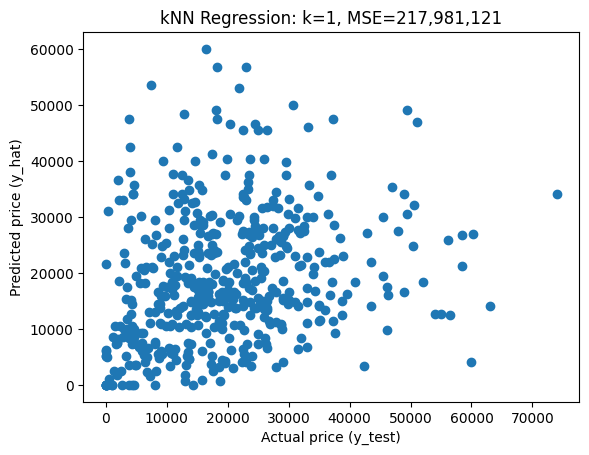

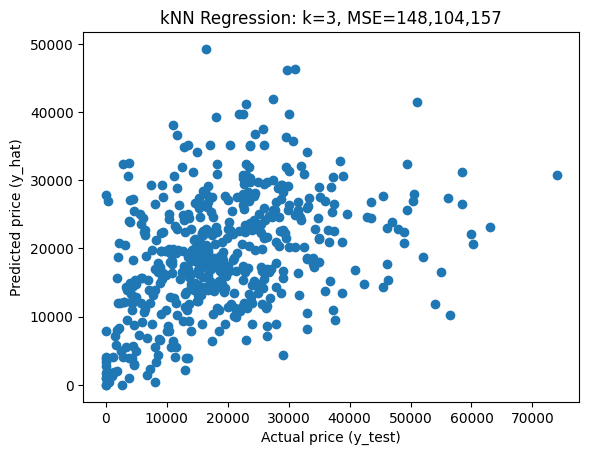

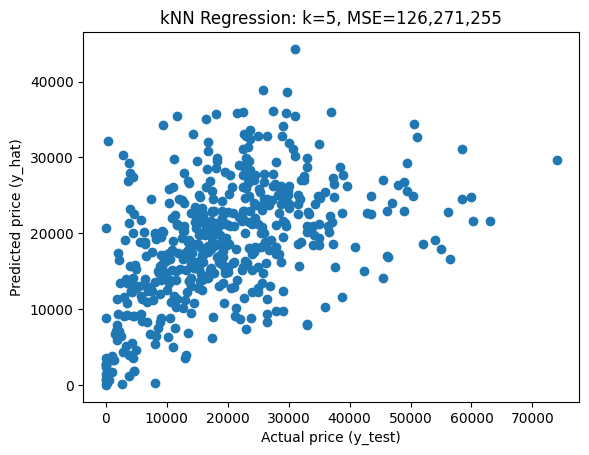

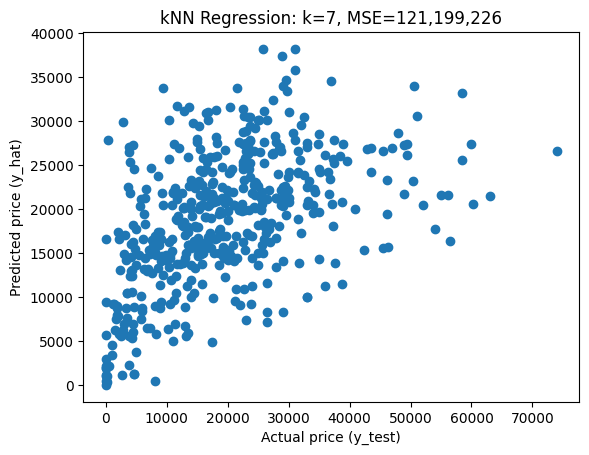

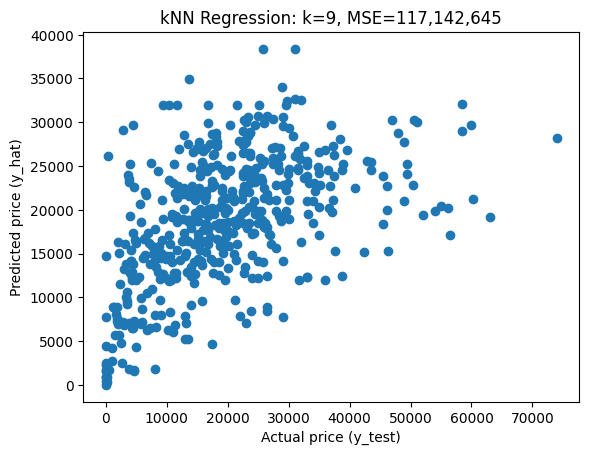

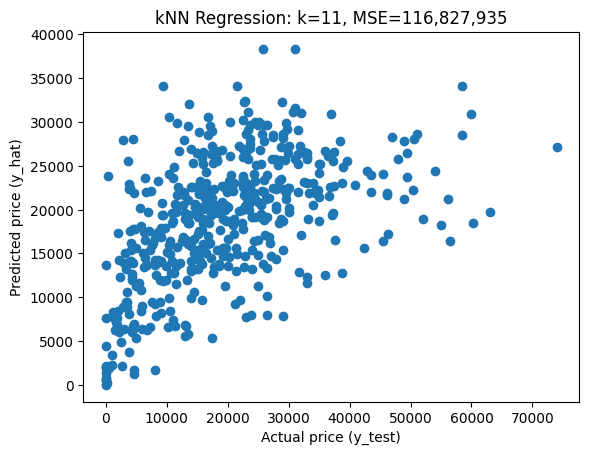

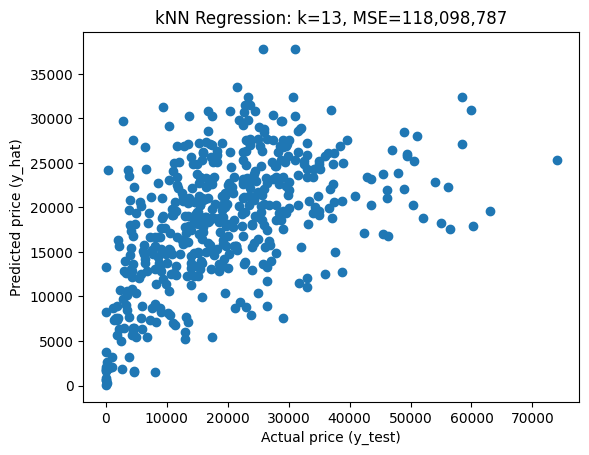

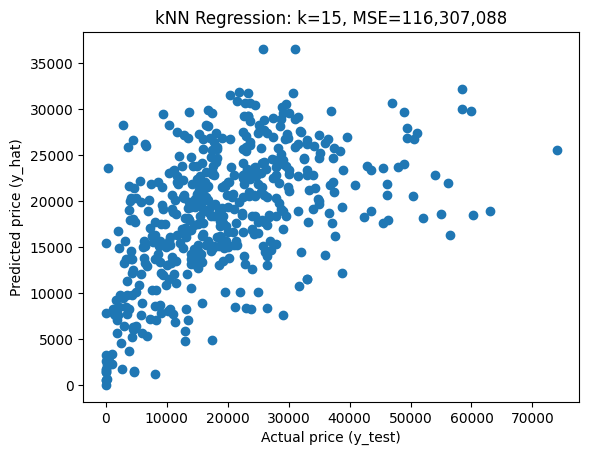

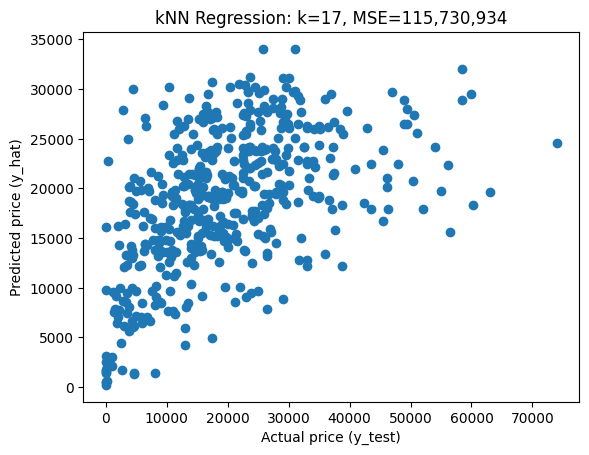

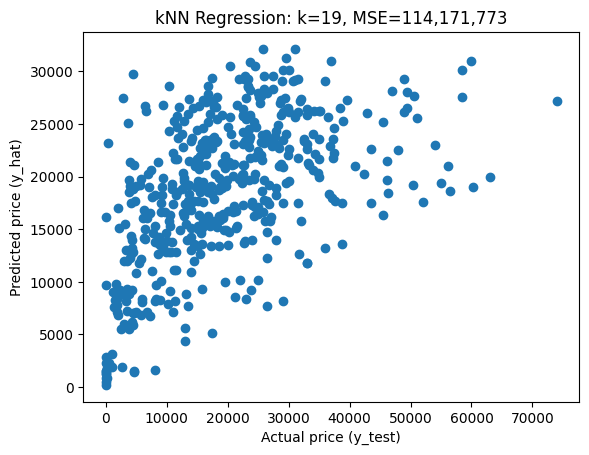

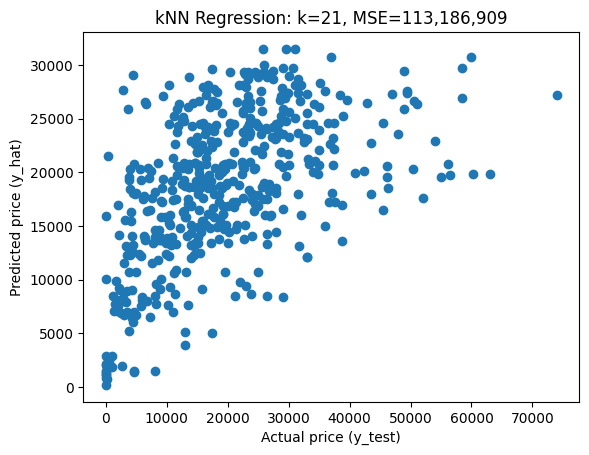

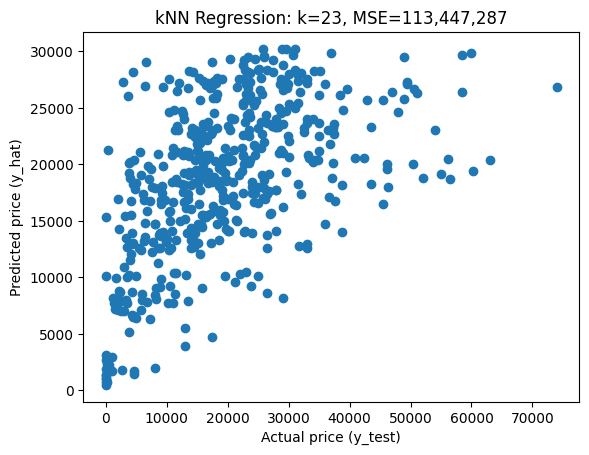

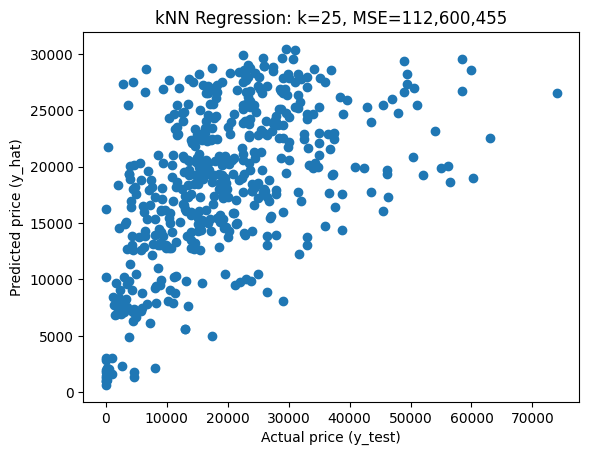

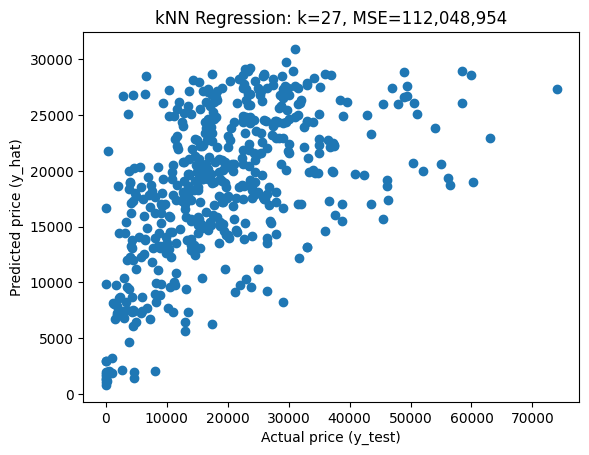

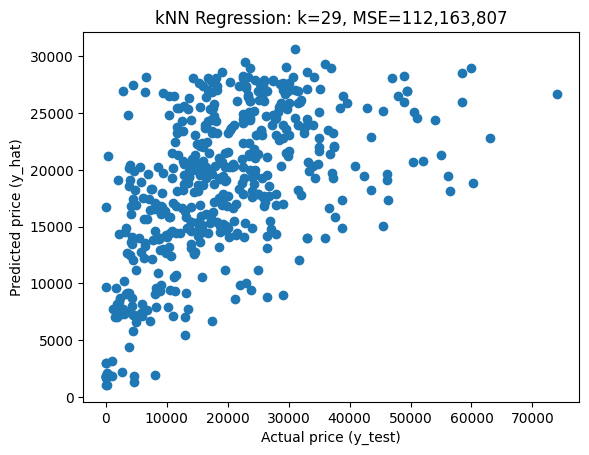

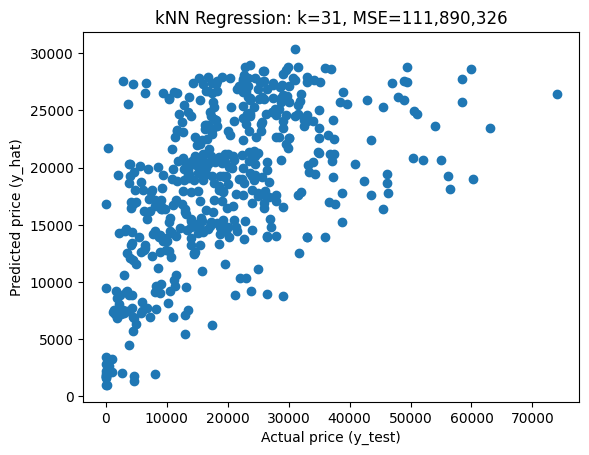

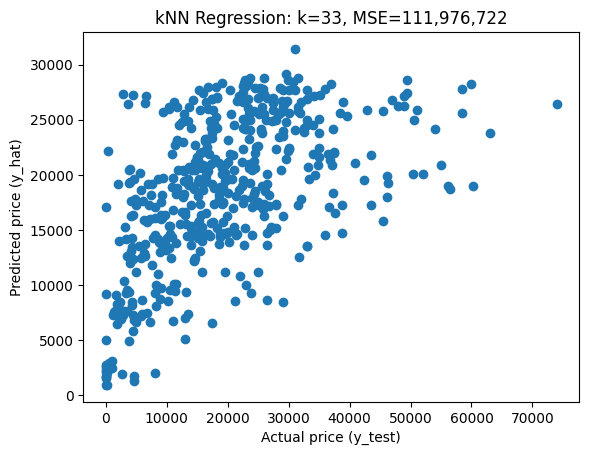

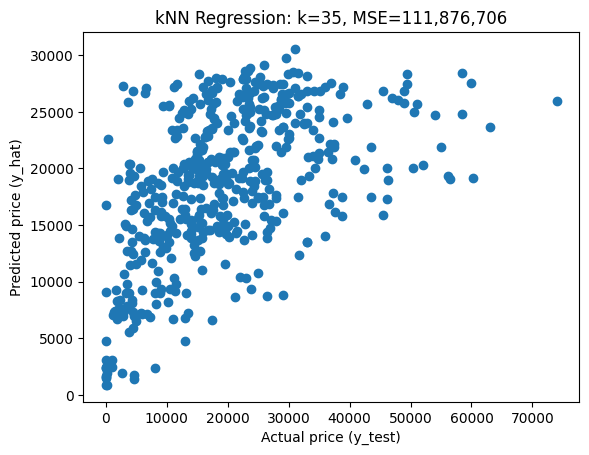

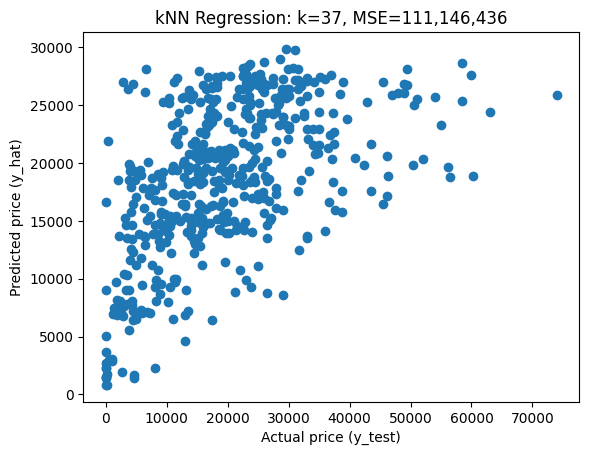

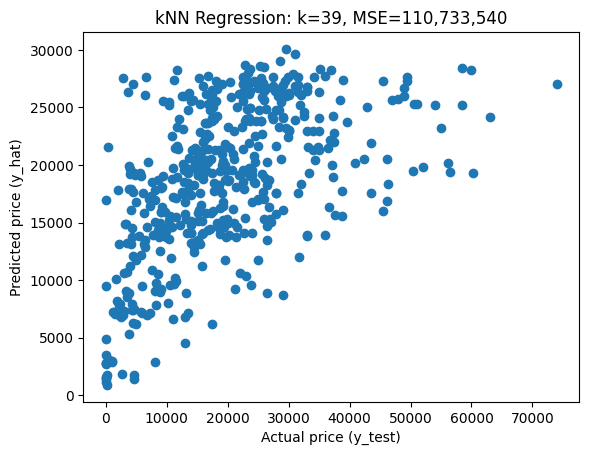

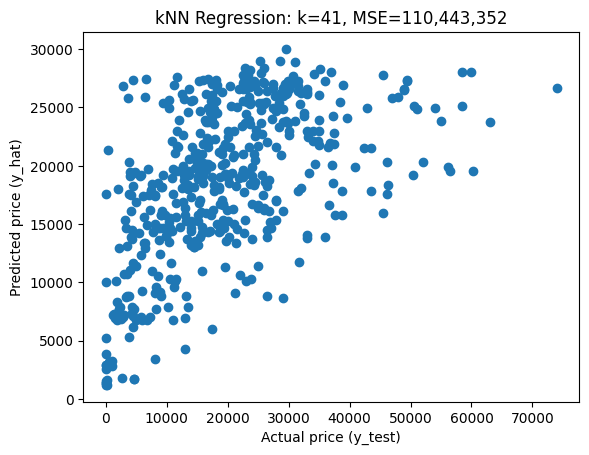

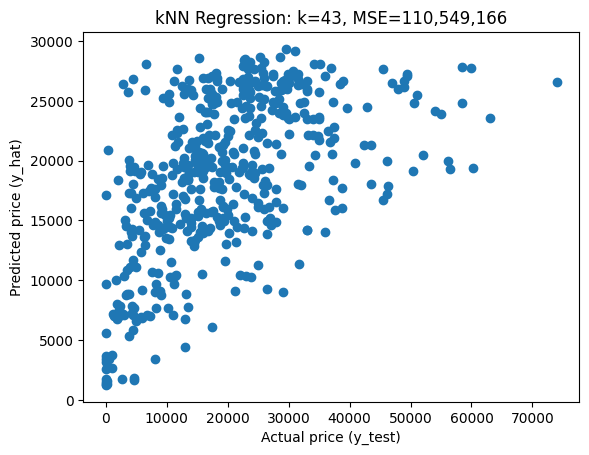

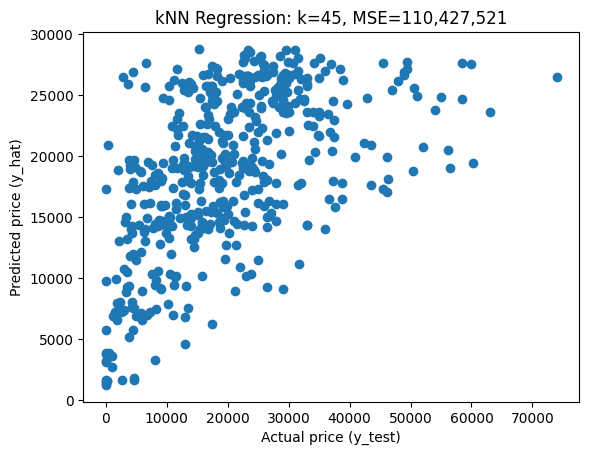

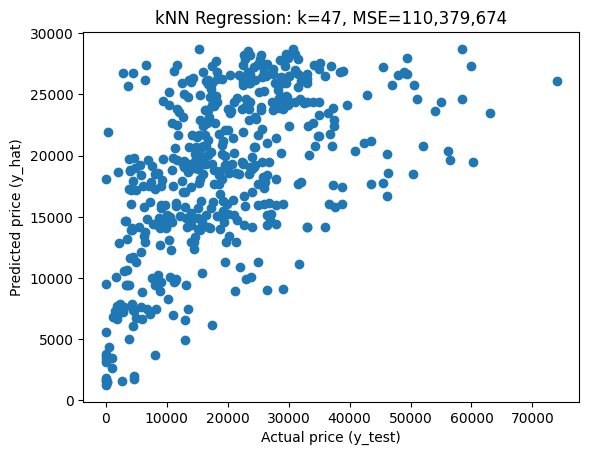

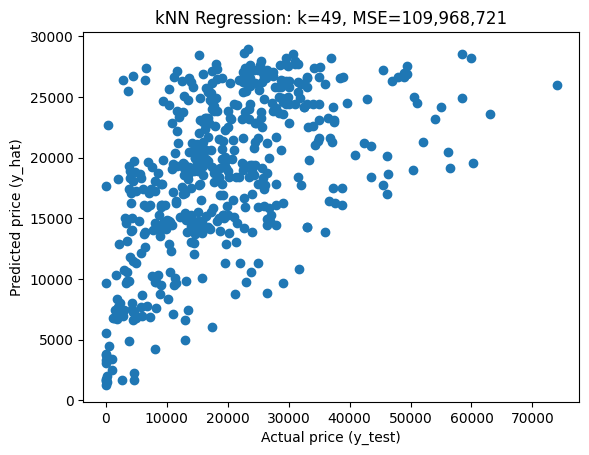

     k           mse
24  49  1.099687e+08
23  47  1.103797e+08
22  45  1.104275e+08
20  41  1.104434e+08
21  43  1.105492e+08
19  39  1.107335e+08
18  37  1.111464e+08
17  35  1.118767e+08
15  31  1.118903e+08
16  33  1.119767e+08
Best k = 49 with MSE = 109968721.06491628 and RMSE = 10486.597210960106


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

df = pd.read_csv("/Users/david/Downloads/analytics/ml_container/data/USA_cars_datasets.csv")
df = df.loc[:, ["price", "year", "mileage"]]

print(df.head())
print("Shape:", df.shape)
print("NA counts:\n", df.isna().sum())

df = df.dropna(axis=0, how="any")

def minmax(s):
    return (s - s.min()) / (s.max() - s.min())

df["year_mm"] = minmax(df["year"])
df["mileage_mm"] = minmax(df["mileage"])

X = df[["year_mm", "mileage_mm"]].values
y = df["price"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

k_grid = list(range(1, 51, 2))  # odd k values
results = []

for k in k_grid:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)

    mse = mean_squared_error(y_test, y_hat)
    results.append((k, mse))

    plt.figure()
    plt.scatter(y_test, y_hat)
    plt.xlabel("Actual price (y_test)")
    plt.ylabel("Predicted price (y_hat)")
    plt.title(f"kNN Regression: k={k}, MSE={mse:,.0f}")
    plt.show()

results_df = pd.DataFrame(results, columns=["k", "mse"]).sort_values("mse")
print(results_df.head(10))

best_k = int(results_df.iloc[0]["k"])
best_mse = float(results_df.iloc[0]["mse"])
print("Best k =", best_k, "with MSE =", best_mse, "and RMSE =", np.sqrt(best_mse))

**Q4.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$-NN classification or regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has the best Mean Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the RMSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

ANSWERS

When performing task 5-7, I compared its test MSE/RMSE to the model with only the most predictive variables: the model with the lower test MSE has better performance on unseen data. If I was to use one in practice, I’d go for the smaller selected-variable model if its RMSE is similar since kNN may get worse if theres too much noise and because it's easier to deploy. When changing which variables were included, the RMSE shifted, meaning feature choice matters but the additional variables don;t always produce better results. In other words, more variables does not always work better for kNN since more dimensions can dilute distances and lead to worse generalization.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix

df = pd.read_csv("/Users/david/Downloads/analytics/ml_container/data/heart_failure_clinical_records_dataset.csv")
print("NA counts:\n", df.isna().sum())

df = df.dropna(axis=0, how="any")
df = df.drop(columns=["time"])

corr = df.corr(numeric_only=True)
print("Top correlations with DEATH_EVENT:")
print(corr["DEATH_EVENT"].sort_values(ascending=False))

dummy_vars = ["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking"]
for v in dummy_vars:
    tab = df.groupby(v)["DEATH_EVENT"].mean()
    counts = df[v].value_counts().sort_index()
    print(f"\n{v}:")
    print("Counts:\n", counts)
    print("P(DEATH_EVENT=1 |", v, "):\n", tab)

def tune_knn_classifier(X, y, k_grid, random_state=42):
    # split once and reuse (as requested)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.20, random_state=random_state, stratify=y
    )

    
    scaler = MinMaxScaler()
    X_train_sc = scaler.fit_transform(X_train)
    X_test_sc = scaler.transform(X_test)

    out = []
    for k in k_grid:
        clf = KNeighborsClassifier(n_neighbors=k)
        clf.fit(X_train_sc, y_train)

        y_pred = clf.predict(X_test_sc)
        acc = accuracy_score(y_test, y_pred)

        
        y_prob1 = clf.predict_proba(X_test_sc)[:, 1]
        mse = mean_squared_error(y_test, y_prob1)
        rmse = np.sqrt(mse)

        out.append((k, acc, mse, rmse))

    out_df = pd.DataFrame(out, columns=["k", "accuracy", "mse(prob)", "rmse(prob)"])
    best_row = out_df.sort_values(["accuracy", "rmse(prob)"], ascending=[False, True]).iloc[0]

    best_k = int(best_row["k"])
    best_clf = KNeighborsClassifier(n_neighbors=best_k)
    best_clf.fit(X_train_sc, y_train)
    best_pred = best_clf.predict(X_test_sc)

    cm = confusion_matrix(y_test, best_pred)
    return out_df, best_row, cm

y = df["DEATH_EVENT"].values


selected_features = ["serum_creatinine", "ejection_fraction", "age", "serum_sodium"]
X_sel = df[selected_features].values

k_grid = list(range(1, 41, 2))

sel_results, sel_best, sel_cm = tune_knn_classifier(X_sel, y, k_grid)
print("\n=== Selected-features model ===")
print("Features used:", selected_features)
print(sel_results.sort_values(["accuracy", "rmse(prob)"], ascending=[False, True]).head(10))
print("Best row:\n", sel_best)
print("Confusion matrix:\n", sel_cm)

X_all = df.drop(columns=["DEATH_EVENT"]).values

all_results, all_best, all_cm = tune_knn_classifier(X_all, y, k_grid)
print("\n=== All-features model ===")
print(all_results.sort_values(["accuracy", "rmse(prob)"], ascending=[False, True]).head(10))
print("Best row:\n", all_best)
print("Confusion matrix:\n", all_cm)

NA counts:
 age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64
Top correlations with DEATH_EVENT:
DEATH_EVENT                 1.000000
serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
Name: DEATH_EVENT, dtype: float64

anaemia:
Counts:
 anaemia
0    170
1    129
Name: count, dtype: int64
P

**Q5.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on. 

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be. Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion matrix for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying proportions/probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

**Q6.** This is a case study using $k$ nearest neighbor regression for imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to column filter the dataframe to those variables.
2. Set use `.isnull()` and `.loc` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings. 
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Describe what you see.

**Q7.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and use $k$-NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5): 
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a list of matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set? Report the accuracy, compute a confusion matrix, and explain your findings.
6. For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?
7. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

ANSWERS
7.2 The shape of X_train is: (60000, 28, 28) and the shape of X_test is: (10000, 28, 28). For each i, X_train[i] and X_test[i] each have shape (28, 28). The shape of y_train is: (60000,) and the shape of y_test is: (10000,).
7.5 Using the optimal choice k = 3, the test accuracy for the kNN classifier was 0.9705 or 97.05%. This shows that it the model correctly classified about 97% of the total 10,000 test images. The confusion matrix shows most mass on the diagonal (correct predictions), therefore there is overall strong performance, although there are some errors concentrated in a few digit pairs that have similar handwriting shapes.
7.6 The most likely mistakes are 7→1 (occurred 21 times), 4→9 (19 times), 8→3 (16 times), 3→5 (13 times), and 2→7 (13 times). An interesting pattern is that the model seems to mix up numbers that look visually similar in pixel form: it confuses straight-stroke digits (7 and 1) and similar-curve digits (4 and 9, 8 and 3). In other words, its errors are not simply just random.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

df = mnist.load_data('minst.db')
train, test = df
X_train, y_train = train
X_test, y_test = test

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("One image shape:", X_train[0].shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train_2d = X_train.reshape((X_train.shape[0], 784))
X_test_2d = X_test.reshape((X_test.shape[0], 784))

X_train_2d = X_train_2d / 255.0
X_test_2d = X_test_2d / 255.0

k_grid = [1, 3, 5, 7, 9, 11]
best = None

for k in k_grid:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train_2d, y_train)
    pred = clf.predict(X_test_2d)
    acc = accuracy_score(y_test, pred)
    print(f"k={k}, accuracy={acc:.4f}")
    if best is None or acc > best[1]:
        best = (k, acc, pred)

best_k, best_acc, best_pred = best
print("\nBest k:", best_k, "Best accuracy:", best_acc)

cm = confusion_matrix(y_test, best_pred)
print("\nConfusion matrix:\n", cm)

2026-02-25 22:50:19.611488: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


X_train: (60000, 28, 28)
X_test: (10000, 28, 28)
One image shape: (28, 28)
y_train: (60000,)
y_test: (10000,)
k=1, accuracy=0.9691
k=3, accuracy=0.9705
k=5, accuracy=0.9688
k=7, accuracy=0.9694
k=9, accuracy=0.9659
k=11, accuracy=0.9668

Best k: 3 Best accuracy: 0.9705

Confusion matrix:
 [[ 974    1    1    0    0    1    2    1    0    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [  10    9  996    2    0    0    0   13    2    0]
 [   0    2    4  976    1   13    1    7    3    3]
 [   1    6    0    0  950    0    4    2    0   19]
 [   6    1    0   11    2  859    5    1    3    4]
 [   5    3    0    0    3    3  944    0    0    0]
 [   0   21    5    0    1    0    0  991    0   10]
 [   8    2    4   16    8   11    3    4  914    4]
 [   4    5    2    8    9    2    1    8    2  968]]
